In [2]:
import numpy as np
from helpers import *
import cv2
import matplotlib.pyplot as plt

In [64]:
im1 = cv2.imread("data/sequence/000001.png")
im2 = cv2.imread("data/sequence/000002.png")
im3 = cv2.imread("data/sequence/000003.png")
K = np.loadtxt('data/K.txt')

(<matplotlib.image.AxesImage at 0x25ffea34280>,
 array([[910.,   0., 582.],
        [  0., 910., 437.],
        [  0.,   0.,   1.]]))

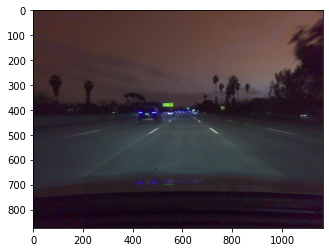

In [65]:
plt.imshow(im1), K

In [66]:
sift = cv2.SIFT_create()
kp0, des0 = sift.detectAndCompute(im1,None)
kp0, des0 = kp0[:2000], des0[:2000]
kp0 = np.array([k.pt for k in kp0])
kp1, des1 = sift.detectAndCompute(im2,None)
kp1, des1 = kp1[:2000], des1[:2000]
kp1 = np.array([k.pt for k in kp1])
kp2, des2 = sift.detectAndCompute(im3,None)
kp2, des2 = kp2[:2000], des2[:2000]
kp2 = np.array([k.pt for k in kp2])

In [67]:
bf = cv2.BFMatcher_create(crossCheck=True)
matches01 = bf.match(des0, des1)
matches01 = sorted(matches01, key = lambda x:x.distance)
matches01 = np.array([(m.queryIdx, m.trainIdx) for m in matches01])

matches12 = bf.match(des1, des2)
matches12 = sorted(matches12, key = lambda x:x.distance)
matches12 = np.array([(m.queryIdx, m.trainIdx) for m in matches12])

In [68]:
points1 = kp0[matches01[:,0]]
points2 = kp1[matches01[:,1]]
E,_ = cv2.findEssentialMat(points1,points2,K)
E

array([[-5.09910987e-04, -7.06046178e-01, -3.47517861e-03],
       [ 7.06050449e-01, -4.91621936e-04, -3.85056972e-02],
       [ 3.16364423e-03,  3.85523193e-02,  1.87499803e-05]])

In [71]:
_,R,t,_ = cv2.recoverPose(E,points1,points2)
R.T.dot(t), R.T

(array([[ 0.05445172],
        [-0.00495399],
        [ 0.99850412]]),
 array([[ 9.99999737e-01,  7.22513601e-04, -6.96030980e-05],
        [-7.22546973e-04,  9.99999623e-01, -4.80639784e-04],
        [ 6.92558030e-05,  4.80689949e-04,  9.99999882e-01]]))

In [76]:
import transforms3d
angles = transforms3d.euler.mat2euler(R.T, axes='szyx')

(-0.0007225136654241458, -6.960309801821467e-05, 0.0004806398037225548)